# Lets start our regression problem for predicting the car price

### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
tf.__version__

'2.18.0'

* reading the dataset

In [2]:
Car_price = pd.read_csv(r"Datasets\CarPrice_Assignment.csv")
Car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
Car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Since Carname has morethan 50 no of categories we dropping that column and we don't require car_ID column we can drop

In [4]:
Car_price = Car_price.drop(columns=['car_ID', 'CarName'], axis=1)
Car_price.shape

(205, 24)

In [5]:
columns_to_be_encoded ={}
for column in Car_price.columns:
    if Car_price[column].dtype == 'object':
        columns_to_be_encoded[column] = Car_price[column].unique()
columns_to_be_encoded

{'fueltype': array(['gas', 'diesel'], dtype=object),
 'aspiration': array(['std', 'turbo'], dtype=object),
 'doornumber': array(['two', 'four'], dtype=object),
 'carbody': array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
       dtype=object),
 'drivewheel': array(['rwd', 'fwd', '4wd'], dtype=object),
 'enginelocation': array(['front', 'rear'], dtype=object),
 'enginetype': array(['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'], dtype=object),
 'cylindernumber': array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
       dtype=object),
 'fuelsystem': array(['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi'],
       dtype=object)}

In [6]:
one_hot_columns = []
label_encode_columns = []
for column, unique_values in columns_to_be_encoded.items():
    if len(unique_values) < 4:
        one_hot_columns.append(column)
    else:
        label_encode_columns.append(column)
one_hot_columns, label_encode_columns

(['fueltype', 'aspiration', 'doornumber', 'drivewheel', 'enginelocation'],
 ['carbody', 'enginetype', 'cylindernumber', 'fuelsystem'])

In [7]:
for column in Car_price.columns:
    if Car_price[column].dtype != 'object':
        print(f"{column}: {Car_price[column].mean()}")
        print(f"{column}: {Car_price[column].median()}")

symboling: 0.8341463414634146
symboling: 1.0
wheelbase: 98.75658536585367
wheelbase: 97.0
carlength: 174.04926829268288
carlength: 173.2
carwidth: 65.90780487804878
carwidth: 65.5
carheight: 53.72487804878049
carheight: 54.1
curbweight: 2555.5658536585365
curbweight: 2414.0
enginesize: 126.90731707317073
enginesize: 120.0
boreratio: 3.329756097560975
boreratio: 3.31
stroke: 3.255414634146341
stroke: 3.29
compressionratio: 10.142536585365855
compressionratio: 9.0
horsepower: 104.1170731707317
horsepower: 95.0
peakrpm: 5125.121951219512
peakrpm: 5200.0
citympg: 25.21951219512195
citympg: 24.0
highwaympg: 30.75121951219512
highwaympg: 30.0
price: 13276.710570731706
price: 10295.0


In [8]:
columns_to_be_scaled = []
for column in Car_price.columns:
    if Car_price[column].dtype != 'object' and column != 'symboling' and column != 'price':
        columns_to_be_scaled.append(column)
columns_to_be_scaled

['wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg']

In [9]:
from sklearn.preprocessing import LabelEncoder
Car_price_encoded = Car_price
le = LabelEncoder()
for column in label_encode_columns:
    Car_price_encoded[column] = le.fit_transform(Car_price_encoded[column])
    print(f"{column}: {Car_price_encoded[column].unique()}")
Car_price_encoded.head()

carbody: [0 2 3 4 1]
enginetype: [0 5 3 2 6 4 1]
cylindernumber: [2 3 1 4 5 6 0]
fuelsystem: [5 1 4 0 7 2 3 6]


,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,0,rwd,front,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,0,rwd,front,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,2,rwd,front,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,3,fwd,front,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,3,4wd,front,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [10]:
X, y = Car_price_encoded.drop(columns=['price'], axis=1), Car_price['price']
X.shape, y.shape

((205, 23), (205,))

In [11]:
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
ct_ohe = make_column_transformer(
    (MinMaxScaler(), columns_to_be_scaled),
    (OneHotEncoder(handle_unknown="ignore", drop= None), one_hot_columns),
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct_ohe.fit(X_train)
X_train_min_scaled = ct_ohe.transform(X_train)
X_test_min_scaled = ct_ohe.transform(X_test)
X_train.shape, X_train_min_scaled.shape, X_test_min_scaled.shape, y_train.shape, y_test.shape

((164, 23), (164, 29), (41, 29), (164,), (41,))

## Building neural network model
* 1. Build a regressor model using sequential since we are creating linear relation using activation as None or Linear is fine
* 2. Compile the model with optimizer = SGD or Adam, loss = mae, metrics = mae
* 3. Fit the model with the training data with epochs of 100

In [12]:
X_train_min_scaled[0].shape

(29,)

In [13]:
tf.random.set_seed(42)

## 1. Build a model
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model1.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.001),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model1_history = model1.fit(X_train_min_scaled, y_train, epochs = 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 13283.1865 - mae: 13283.1865  
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13282.7168 - mae: 13282.7168 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13282.2471 - mae: 13282.2471 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13281.7764 - mae: 13281.7764 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13281.3027 - mae: 13281.3027 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13280.8203 - mae: 13280.8203 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13280.3301 - mae: 13280.3301 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 13279.8281 - mae: 13279.8281
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13279.3096 - mae: 13279.3096 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13278.7764 - mae: 13278.7764 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13278.2207 - mae: 13278.2207 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s

<Axes: >

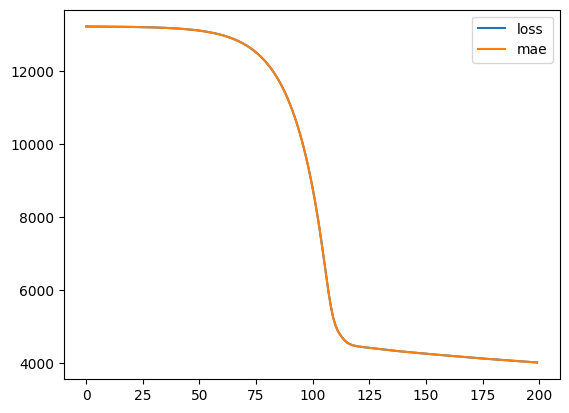

In [14]:
pd.DataFrame(model1_history.history).plot()

### Lets try with learning rate 0.01

In [15]:
tf.random.set_seed(42)

## 1. Build a model
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model2_history = model2.fit(X_train_min_scaled, y_train, epochs = 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 13279.3994 - mae: 13279.3994  
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13272.4609 - mae: 13272.4609 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13260.1836 - mae: 13260.1836 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13236.0078 - mae: 13236.0078 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13187.0537 - mae: 13187.0537 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13087.2363 - mae: 13087.2363 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12883.3477 - mae: 12883.3477 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12466.6826 - mae: 12466.6826 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 11615.0615 - mae: 11615.0615 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 9874.3438 - mae: 9874.3438   
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 6517.1216 - mae: 6517.1216 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6

<Axes: >

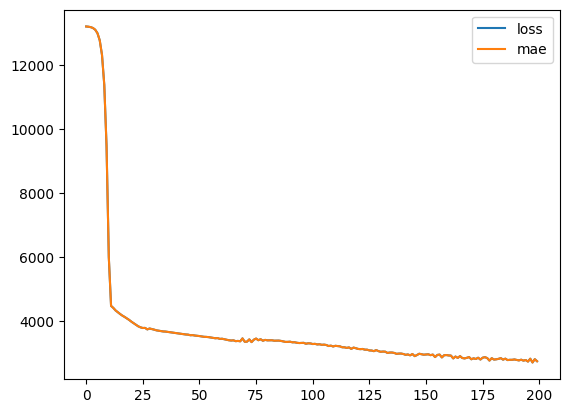

In [16]:
pd.DataFrame(model2_history.history).plot()

### lets try with Adam optimizer

In [17]:
tf.random.set_seed(42)

## 1. Build a model
model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model3.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model3_history = model3.fit(X_train_min_scaled, y_train, epochs = 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 13280.1328 - mae: 13280.1328
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13273.1875 - mae: 13273.1875 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13265.2793 - mae: 13265.2793 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13255.7061 - mae: 13255.7061 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13243.8623 - mae: 13243.8623 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13229.3213 - mae: 13229.3213 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13211.7568 - mae: 13211.7568 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13190.8848 - mae: 13190.8848 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13166.4697 - mae: 13166.4697 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13138.3096 - mae: 13138.3096 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13106.2402 - mae: 13106.2402 
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 

<Axes: >

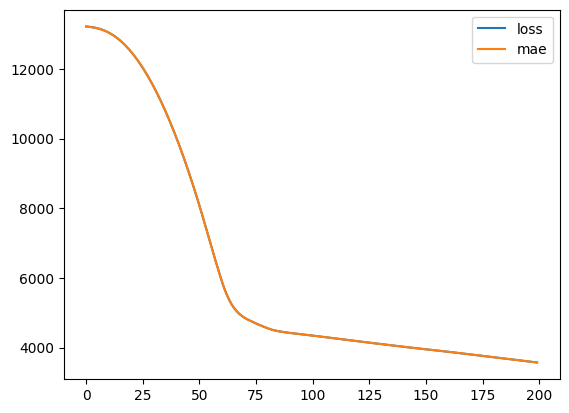

In [18]:
pd.DataFrame(model3_history.history).plot()

### Since our model is performing well with SGD optimizer it is best to go with lets train for 300 epochs

In [19]:
tf.random.set_seed(42)

## 1. Build a model
model4 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model4.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model4_history = model4.fit(X_train_min_scaled, y_train, epochs = 300)

Epoch 1/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 13281.6396 - mae: 13281.6396  
Epoch 2/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13275.6279 - mae: 13275.6279 
Epoch 3/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 13265.9785 - mae: 13265.9785 
Epoch 4/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13247.5137 - mae: 13247.5137 
Epoch 5/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13210.3877 - mae: 13210.3877 
Epoch 6/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 13134.8076 - mae: 13134.8076 
Epoch 7/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12980.4746 - mae: 12980.4746 
Epoch 8/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 12665.0879 - mae: 12665.0879 
Epoch 9/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 12020.4521 - mae: 12020.4521 
Epoch 10/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 10702.7637 - mae: 10702.7637 
Epoch 11/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 8017.4761 - mae: 8017.4761 
Epoch 12/300
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7

<Axes: >

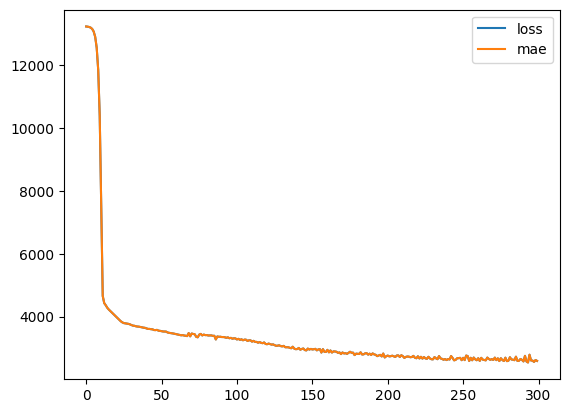

In [20]:
pd.DataFrame(model4_history.history).plot()

In [21]:
model4.evaluate(X_test_min_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 3668.6826 - mae: 3668.6826 


[3581.540283203125, 3581.540283203125]

In [22]:
y_pred = model4.predict(X_test_min_scaled)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [23]:
from sklearn.metrics import r2_score
r2_score(y_pred, y_test)

0.47365346811258136

In [24]:
Car_price_encoded.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,0,rwd,front,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,0,rwd,front,88.6,168.8,64.1,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,2,rwd,front,94.5,171.2,65.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,3,fwd,front,99.8,176.6,66.2,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,3,4wd,front,99.4,176.6,66.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [25]:
X, y = Car_price_encoded.drop(columns=['price'], axis=1), np.log1p(Car_price['price'].values)
X.shape, y.shape

((205, 23), (205,))

In [26]:
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
ct_ohe = make_column_transformer(
    (MinMaxScaler(), columns_to_be_scaled),
    (OneHotEncoder(handle_unknown="ignore", drop= None), one_hot_columns),
    remainder='passthrough'
)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
ct_ohe.fit(X_train)
X_train_min_scaled = ct_ohe.transform(X_train)
X_test_min_scaled = ct_ohe.transform(X_test)
X_train.shape, X_train_min_scaled.shape, X_test_min_scaled.shape, y_train.shape, y_test.shape

((164, 23), (164, 29), (41, 29), (164,), (41,))

In [27]:
tf.random.set_seed(42)

## 1. Build a model
log_model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(10, activation= 'linear'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
log_model1.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
log_model1_history = log_model1.fit(X_train_min_scaled, y_train, epochs = 200)

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 8.4780 - mae: 8.4780  
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2.8717 - mae: 2.8717 
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.2750 - mae: 1.2750 
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1515 - mae: 1.1515 
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.1095 - mae: 1.1095 
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0161 - mae: 1.0161 
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.9875 - mae: 0.9875 
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9806 - mae: 0.9806 
Epoch 9/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9667 - mae: 0.9667 
Epoch 10/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.9135 - mae: 0.9135 
Epoch 11/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0878 - mae: 1.0878
Epoch 12/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8677 - mae: 0.8677 
Epoch 13/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/ste

<Axes: >

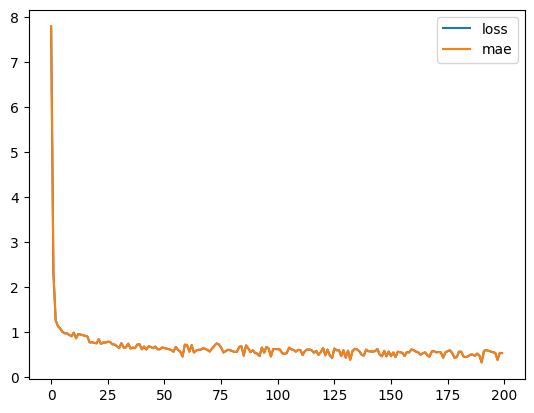

In [28]:
pd.DataFrame(log_model1_history.history).plot()

In [29]:
y_pred = log_model1.predict(X_test_min_scaled)
r2_score(y_pred, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


0.5986504781309054

* lets try making our model more complex and including batch size as well and by changing activation function

In [30]:
tf.random.set_seed(42)

## 1. Build a model
log_model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(29, )),
    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(16, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
log_model2.compile(optimizer = tf.keras.optimizers.SGD(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
log_model2_history = log_model2.fit(X_train_min_scaled, y_train, epochs = 300, batch_size = 16)

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7361 - mae: 8.7361  
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.6117 - mae: 2.6117 
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1.2864 - mae: 1.2864 
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4592 - mae: 1.4592 
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2586 - mae: 1.2586 
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1348 - mae: 1.1348 
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2320 - mae: 1.2320 
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1546 - mae: 1.1546 
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.1960 - mae: 1.1960 
Epoch 10/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2746 - mae: 1.2746 
Epoch 11/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.0688 - mae: 1.0688 
Epoch 12/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.2679 - mae: 1.2679 
Epoch 13/300
11/11 ━━━━━

<Axes: >

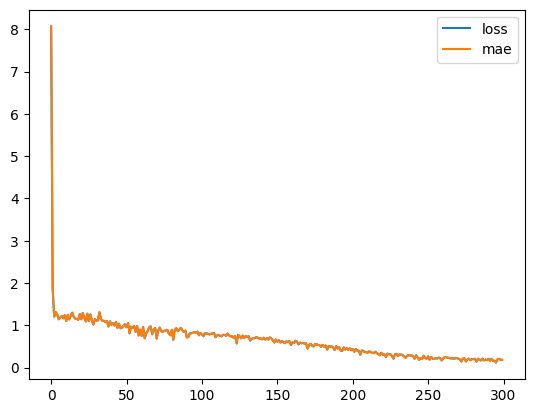

In [31]:
pd.DataFrame(log_model2_history.history).plot()

In [32]:
y_pred = log_model2.predict(X_test_min_scaled)
r2_score(y_pred, y_test)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001AC6F3A1300> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


0.5022969896115164

### Feature engineering

In [33]:
corr_matrix = Car_price_encoded.corr(numeric_only= True)
corr_matrix['price']

symboling          -0.079978
carbody            -0.083976
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginetype          0.049171
cylindernumber     -0.027628
enginesize          0.874145
fuelsystem          0.526823
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [34]:
highly_correlated_columns = []
count = 0
for column, value in dict(corr_matrix['price']).items():
    if abs(value) > 0.5:
        highly_correlated_columns.append(column)
        count += 1
highly_correlated_columns, count

(['wheelbase',
  'carlength',
  'carwidth',
  'curbweight',
  'enginesize',
  'fuelsystem',
  'boreratio',
  'horsepower',
  'citympg',
  'highwaympg',
  'price'],
 11)

In [35]:
columns_to_be_dropped = (set(dict(corr_matrix['price']).keys()) - set(highly_correlated_columns))
columns_to_be_dropped

{'carbody',
 'carheight',
 'compressionratio',
 'cylindernumber',
 'enginetype',
 'peakrpm',
 'stroke',
 'symboling'}

In [41]:
label_encode_columns

['carbody', 'enginetype', 'cylindernumber', 'fuelsystem']

* let us do not remove label encode columns

In [43]:
Car_price_corr = Car_price_encoded.drop(columns = (columns_to_be_dropped - set(label_encode_columns)), axis =1)
Car_price_corr.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,horsepower,citympg,highwaympg,price
0,gas,std,two,0,rwd,front,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,13495.0
1,gas,std,two,0,rwd,front,88.6,168.8,64.1,2548,0,2,130,5,3.47,111,21,27,16500.0
2,gas,std,two,2,rwd,front,94.5,171.2,65.5,2823,5,3,152,5,2.68,154,19,26,16500.0
3,gas,std,four,3,fwd,front,99.8,176.6,66.2,2337,3,2,109,5,3.19,102,24,30,13950.0
4,gas,std,four,3,4wd,front,99.4,176.6,66.4,2824,3,1,136,5,3.19,115,18,22,17450.0


### splitting and Scaling and one hot encoding

* 1. X, y declaring
* 2. Splitting
* 3. Transforming

In [48]:
X,y = Car_price_corr.drop(columns = ['price'], axis=1), np.log1p(Car_price_corr['price'].values)
X,y

(    fueltype aspiration doornumber  carbody drivewheel enginelocation  \
 0        gas        std        two        0        rwd          front   
 1        gas        std        two        0        rwd          front   
 2        gas        std        two        2        rwd          front   
 3        gas        std       four        3        fwd          front   
 4        gas        std       four        3        4wd          front   
 ..       ...        ...        ...      ...        ...            ...   
 200      gas        std       four        3        rwd          front   
 201      gas      turbo       four        3        rwd          front   
 202      gas        std       four        3        rwd          front   
 203   diesel      turbo       four        3        rwd          front   
 204      gas      turbo       four        3        rwd          front   
 
      wheelbase  carlength  carwidth  curbweight  enginetype  cylindernumber  \
 0         88.6      168.8    

In [53]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

ct_corr = make_column_transformer(
    (MinMaxScaler(), list(set(Car_price_corr.columns) - set(one_hot_columns) - {'price'})),
    (OneHotEncoder(handle_unknown="ignore", drop= None), one_hot_columns),
    remainder='passthrough'
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ct_corr.fit(X_train)

X_train_min_scaled = ct_corr.transform(X_train)
X_test_min_scaled = ct_corr.transform(X_test)

X_train.shape, X_train_min_scaled.shape, X_test_min_scaled.shape, y_train.shape, y_test.shape

((164, 18), (164, 24), (41, 24), (164,), (41,))

In [54]:
X_train_min_scaled[0].shape

(24,)

### Build the model with only highly correlated columns

In [60]:
tf.random.set_seed(42)

# 1. Build the sequential model
model1_corr = tf.keras.Sequential([
    tf.keras.Input(shape=(24, )),
    tf.keras.layers.Dense(64, activation= 'relu'),
    tf.keras.layers.Dense(32, activation= 'relu'),
    tf.keras.layers.Dense(16, activation= 'relu'),
    tf.keras.layers.Dense(1, activation= 'linear')
])

## 2. Compile the model
model1_corr.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
            loss = tf.keras.losses.mae,
            metrics = ['mae']
        )

## 3. Fit the model
model1_corr_history = model1_corr.fit(X_train_min_scaled, y_train, epochs = 300, batch_size = 16)

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 6.6181 - mae: 6.6181
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.1065 - mae: 1.1065 
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4725 - mae: 0.4725 
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3353 - mae: 0.3353 
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6597 - mae: 0.6597 
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.4033 - mae: 0.4033 
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7767 - mae: 0.7767 
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3157 - mae: 0.3157 
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.8440 - mae: 0.8440 
Epoch 10/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4746 - mae: 0.4746 
Epoch 11/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2808 - mae: 0.2808 
Epoch 12/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2745 - mae: 0.2745 
Epoch 13/300
11/11 ━━━━━━━

<Axes: >

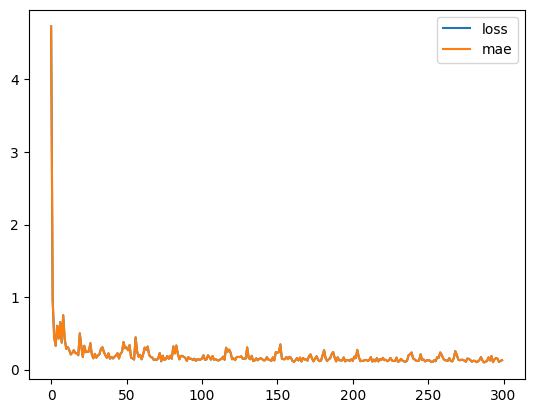

In [61]:
pd.DataFrame(model1_corr_history.history).plot()

In [62]:
y_pred = model1_corr.predict(X_test_min_scaled)
r2_score(y_pred, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


0.8842889162016035

In [63]:
model1_corr.evaluate(X_test_min_scaled, y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.1440 - mae: 0.1440 


[0.1409319043159485, 0.1409319043159485]

In [ ]:
import tensorflow as tf
from sklearn.metrics import r2_score

# function to build and evaluate model
def final_model(X_train_min_scaled, X_test_min_scaled, y_train, y_test, 
                our_optimizer='Adam', activation='relu', our_loss='mae', 
                lr=0.1, epochs=50, batch_size=16, regularizer_type=None, reg_value=0.01):

    tf.random.set_seed(42)

    # Define regularizer
    if regularizer_type == 'l1':
        regularizer = tf.keras.regularizers.l1(reg_value)
    elif regularizer_type == 'l2':
        regularizer = tf.keras.regularizers.l2(reg_value)
    elif regularizer_type == 'l1_l2':
        regularizer = tf.keras.regularizers.l1_l2(l1=reg_value, l2=reg_value)
    else:
        regularizer = None 

    # 1. Build the sequential model
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(X_train_min_scaled.shape[1],)),  
        tf.keras.layers.Dense(64, activation=activation, kernel_regularizer=regularizer),
        tf.keras.layers.Dense(32, activation=activation, kernel_regularizer=regularizer),
        tf.keras.layers.Dense(16, activation=activation, kernel_regularizer=regularizer),
        tf.keras.layers.Dense(1, activation='linear')
    ])

    # 2. Select optimizer dynamically
    optimizers = {
        'Adam': tf.keras.optimizers.Adam(learning_rate=lr),
        'SGD': tf.keras.optimizers.SGD(learning_rate=lr)
    }
    selected_optimizer = optimizers[our_optimizer]

    # 3. Compile the model
    model.compile(optimizer=selected_optimizer,
                  loss=our_loss,
                  metrics=['mae'])

    # 4. Fit the model
    model_history = model.fit(X_train_min_scaled, y_train, epochs=epochs, 
                              batch_size=batch_size, verbose=0)

    # 5. Evaluate model
    loss, mae = model.evaluate(X_test_min_scaled, y_test, verbose=0)
    y_pred = model.predict(X_test_min_scaled)

    return [r2_score(y_test, y_pred), loss, mae] 

In [65]:
hyper_parameters = {
    'lr': [0.001, 0.01, 0.1],
    'our_optimizer': ['SGD', 'Adam'],
    'epochs': [100, 150],
    'batch_size': [16, 32],
    'regularizer_type': [None, 'l1', 'l2', 'l1_l2'], 
    'reg_value': [0.001, 0.01]  
}

results = []

for lr in hyper_parameters['lr']:
    for optimizer in hyper_parameters['our_optimizer']:
        for epochs in hyper_parameters['epochs']:
            for batch_size in hyper_parameters['batch_size']:
                for reg_type in hyper_parameters['regularizer_type']:
                    for reg_value in hyper_parameters['reg_value']:
                        print(f"Training with lr={lr}, optimizer={optimizer}, epochs={epochs}, batch_size={batch_size}, reg_type={reg_type}, reg_value={reg_value}")

                        r2, loss, mae = final_model(X_train_min_scaled, X_test_min_scaled, y_train, y_test,
                                                    our_optimizer=optimizer, lr=lr, epochs=epochs,
                                                    batch_size=batch_size, regularizer_type=reg_type, 
                                                    reg_value=reg_value)

                        results.append({
                            'lr': lr,
                            'optimizer': optimizer,
                            'epochs': epochs,
                            'batch_size': batch_size,
                            'regularizer_type': reg_type,
                            'reg_value': reg_value,
                            'r2_score': r2,
                            'loss': loss,
                            'mae': mae
                        })

best_model = max(results, key=lambda x: x['r2_score'])
print("\nBest Model Parameters:", best_model)


Training with lr=0.001, optimizer=SGD, epochs=100, batch_size=16, reg_type=None, reg_value=0.001
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Training with lr=0.001, optimizer=SGD, epochs=100, batch_size=16, reg_type=None, reg_value=0.01
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Training with lr=0.001, optimizer=SGD, epochs=100, batch_size=16, reg_type=l1, reg_value=0.001
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Training with lr=0.001, optimizer=SGD, epochs=100, batch_size=16, reg_type=l1, reg_value=0.01
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
Training with lr=0.001, optimizer=SGD, epochs=100, batch_size=16, reg_type=l2, reg_value=0.001
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Training with lr=0.001, optimizer=SGD, epochs=100, batch_size=16, reg_type=l2, reg_value=0.01
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Training with lr=0.001, optimizer=SGD, epochs=100, batch_size=16, reg_type=l1_l2, reg_value=0.001
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Training with lr=0.001, optimizer=SGD, epochs=100, batch_size=16

In [66]:
print(best_model)

{'lr': 0.1, 'optimizer': 'Adam', 'epochs': 150, 'batch_size': 32, 'regularizer_type': 'l1', 'reg_value': 0.001, 'r2_score': 0.8832060486099074, 'loss': 0.1861058622598648, 'mae': 0.13619817793369293}


In [36]:
# for i in range(len(Car_price_encoded.columns) - 1):
#     feature_index = i 
#     plt.figure(figsize=(6, 3))
#     sns.scatterplot(x=X_test_min_scaled[:, feature_index], y=y_test, color="blue", label="Actual")
#     sns.scatterplot(x=X_test_min_scaled[:, feature_index], y=y_pred.ravel(), color="red", label="Predicted")
#     plt.xlabel(f"Feature {Car_price_encoded.columns[feature_index]}")
#     plt.ylabel("Target Variable (y)")
#     plt.title(f"Actual vs Predicted Values for Feature {Car_price_encoded.columns[feature_index]}")
#     plt.legend()
#     plt.show()
